In [47]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from matplotlib import rcParams

import statsmodels.api as sm
from statsmodels.tsa.api import VAR

In [19]:
df = pd.read_csv('/Users/richi/Desktop/GaTech/Classes/II Semester/Data Mining/Project/Data/final.csv')

In [20]:
m = df.shape[0]
n = int(0.8*m)
train = df.iloc[:n,:]
test = df.iloc[n:,:]

# Lasso 

In [21]:
Y = train.iloc[:,-1]
X = train.iloc[:,:-1]
# Cross Validation for alpha tuning
params = {'alpha' : list(np.linspace(0.001,1,20))}
folds = KFold(n_splits=5)
model = linear_model.Lasso()
model_cv = GridSearchCV(estimator=model, param_grid=params, cv=folds,
                        scoring='neg_mean_squared_error', verbose=True)
model_cv.fit(X,Y)
alpha2 = model_cv.best_params_['alpha']

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [23]:
Y_test = test.iloc[:,-1]
X_test = test.iloc[:,:-1]

err = mean_squared_error(Y_test, model_cv.predict(X_test))
print('Testing Error Lasso: ', err)

Testing Error Lasso:  0.36434318679501737


# Random Forest

In [29]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
parameters = {'n_estimators':[40,80,100,200,300,400], 'max_depth':[20,50,70,100,150,200]}
mod = RandomForestRegressor(random_state = 29)
rf = GridSearchCV(mod, parameters)
rf.fit(X, y)

GridSearchCV(estimator=RandomForestRegressor(random_state=29),
             param_grid={'max_depth': [20, 50, 70, 100, 150, 200],
                         'n_estimators': [40, 80, 100, 200, 300, 400]})

In [30]:
y_test = test.iloc[:,-1]
X_test = test.iloc[:,:-1]

err = mean_squared_error(y_test, rf.predict(X_test))
print('Testing RF Error: ', err)

Testing RF Error:  0.26846622144308957


# Gradient Boosting

In [31]:
X = train.iloc[:,:-1]
y = train.iloc[:,-1]
parameters = {'learning_rate':abs(np.log(np.linspace(0.99,0.85,5))), 'n_estimators':[80,100,200,300,400],
             'max_depth':[3,5,10,20]}
mod = GradientBoostingRegressor(random_state = 29)
gbc = GridSearchCV(mod, parameters)
gbc.fit(X, y)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=29),
             param_grid={'learning_rate': array([0.01005034, 0.04604394, 0.08338161, 0.12216763, 0.16251893]),
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': [80, 100, 200, 300, 400]})

In [32]:
y_test = test.iloc[:,-1]
X_test = test.iloc[:,:-1]

err = mean_squared_error(y_test, gbc.predict(X_test))
print('Testing Boosting Error: ', err)

Testing Boosting Error:  0.26689462451360035


# Plots

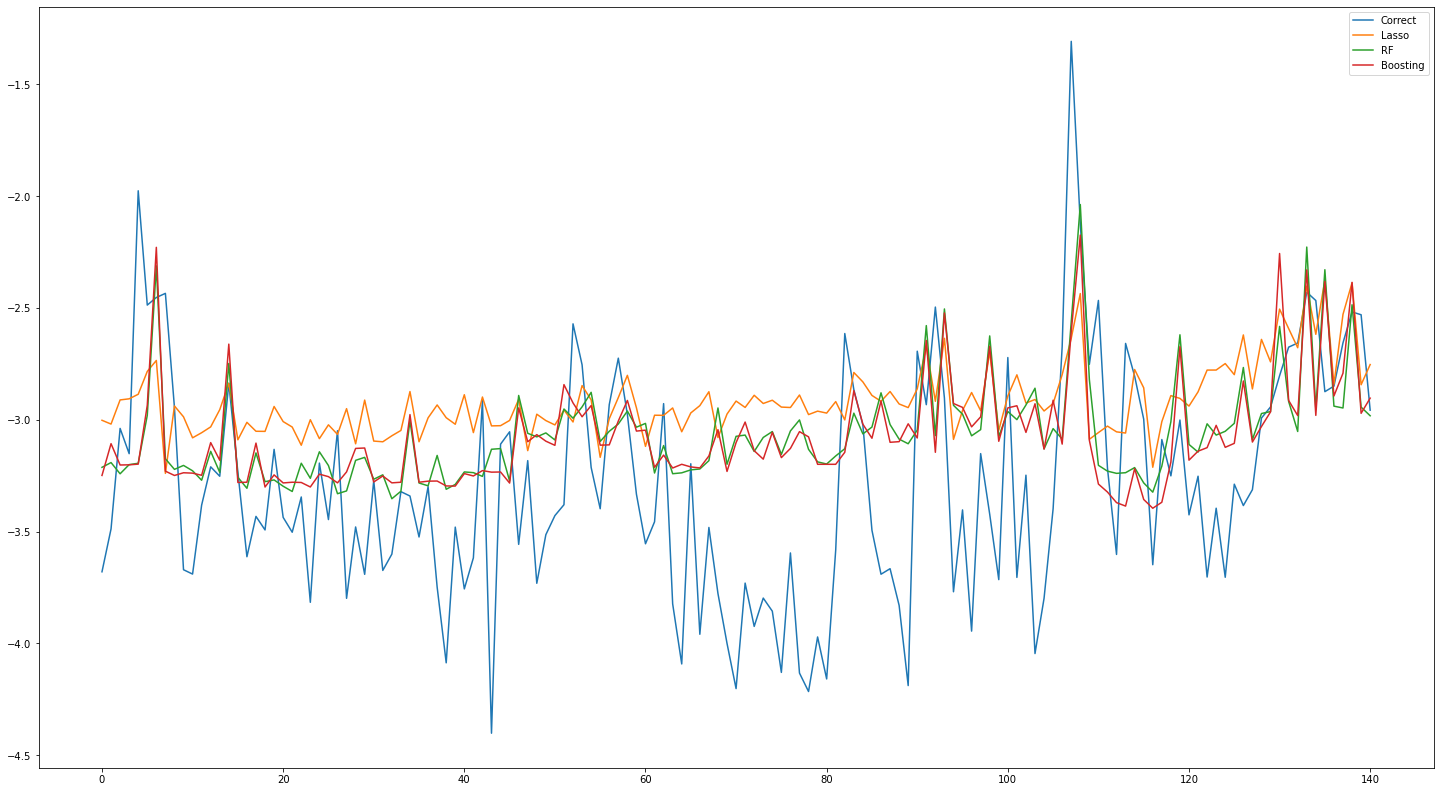

In [45]:
rcParams['figure.figsize'] = (25, 14)
plt.figure()
m = len(test)
plt.plot(range(m),test.iloc[:,-1])
plt.plot(range(m),model_cv.predict(X_test))
plt.plot(range(m),rf.predict(X_test))
plt.plot(range(m),gbc.predict(X_test))
plt.legend(['Correct','Lasso','RF','Boosting'])

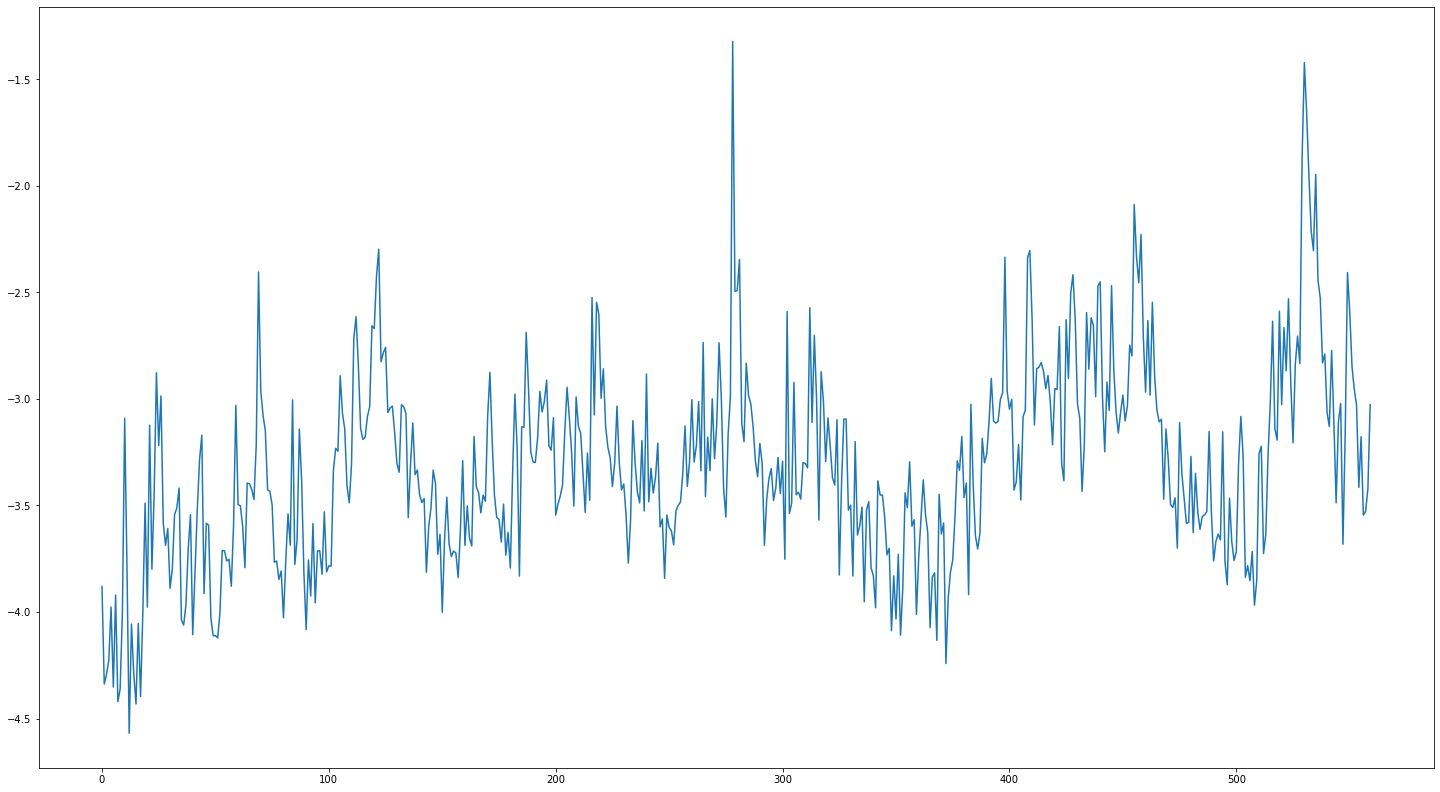

In [46]:
plt.plot(train.iloc[:,-1])

# VAR

In [68]:
test

,Month,DP,EP,Mkt-RF,SMB,HML,STR,TB,TS,INF,IP,RV
560,201103,0.02023,0.068842,0.46,2.63,-1.85,-0.86,0.10,3.37,2.619242,1.063521,-3.679739
561,201104,0.02023,0.068842,2.90,-0.50,-2.49,-1.08,0.06,3.26,3.077234,-0.350599,-3.487907
562,201105,0.02023,0.068842,-1.27,-0.71,-2.00,-1.22,0.04,3.01,3.458972,0.133472,-3.038567
563,201106,0.02023,0.068842,-1.75,0.13,-0.39,-0.93,0.04,3.14,3.502318,0.287062,-3.151517
564,201107,0.02023,0.068842,-2.35,-1.20,-0.90,-1.07,0.04,2.78,3.579881,0.474658,-1.975844
...,...,...,...,...,...,...,...,...,...,...,...,...
696,202207,0.01290,0.027809,9.57,1.86,-4.10,6.32,2.23,0.44,8.413182,0.434819,-2.849558
697,202208,0.01290,0.027809,-3.77,1.49,0.30,1.70,2.63,0.52,8.227361,0.098514,-2.655833
698,202209,0.01290,0.027809,-9.35,-0.97,0.06,-1.61,3.13,0.70,8.214854,0.284692,-2.517673
699,202210,0.01290,0.027809,7.83,1.86,8.05,0.33,3.72,0.38,7.762493,-0.153291,-2.530221


In [98]:
var = VAR(train.iloc[:,1:])
results = var.fit(maxlags=15, ic='aic')

In [99]:
test_new = test.iloc[:,1:]
lag_order = results.k_ar
results.forecast(test_new.values,5)
#y_pred = np.matrix(m)[:,-1]

array([[ 0.01357561,  0.02867686, -1.64899435,  2.43118618,  0.68278575,
         2.57772106,  3.94737928, -0.20151263,  6.89575307, -0.54611552,
        -2.92757956],
       [ 0.01437144,  0.02925007,  0.77327592,  1.24773986, -0.2194753 ,
         2.12626518,  3.80392585,  0.07746514,  6.89337238, -0.25244028,
        -3.01430149],
       [ 0.01495458,  0.0313909 ,  0.25844938,  2.02222396,  0.25752256,
         2.00879519,  3.82353722,  0.18328686,  6.86171595, -0.31519718,
        -3.05987644],
       [ 0.01529912,  0.03269649, -0.51620765,  1.29718213,  0.57001442,
         0.77255344,  3.83945158,  0.29497647,  6.8308385 , -0.37231332,
        -3.02902691],
       [ 0.01576908,  0.03427767, -0.78204193,  0.98897165,  0.50831723,
         0.92992475,  3.84428175,  0.3944269 ,  6.81563498, -0.28023481,
        -3.05193288]])

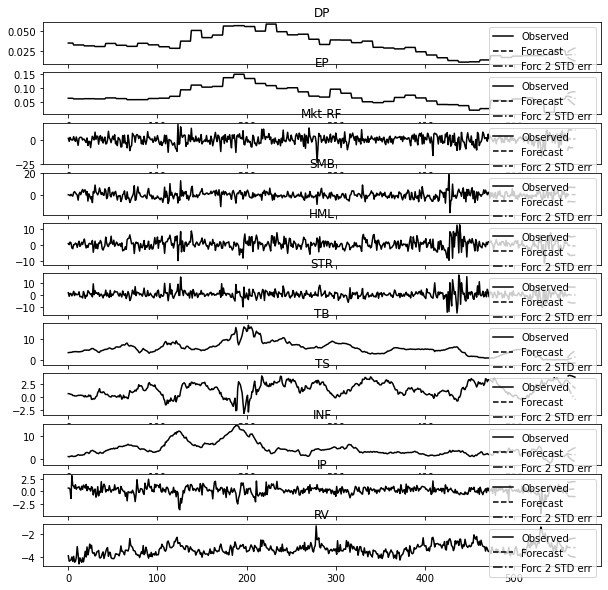

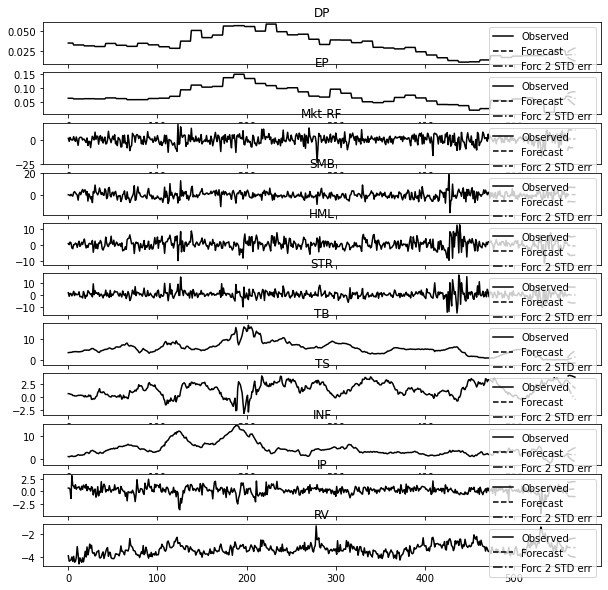

In [100]:
results.plot_forecast(10)